In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
base = pd.read_csv('petr4_treinamento_ex.csv')
base = base.dropna()

In [3]:
base_treinamento =  base.iloc[:,1:2].values

In [4]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento = normalizador.fit_transform(base_treinamento)
base_treinamento.shape

(1342, 1)

In [5]:
base_treinamento

array([[0.68207343],
       [0.67429801],
       [0.69676026],
       ...,
       [0.86522678],
       [0.68466518],
       [0.71058315]])

In [6]:
previsores = []
preco_real = []

for i in range(90,base_treinamento.shape[0]):
    previsores.append(base_treinamento[i-90:i,0])
    preco_real.append(base_treinamento[i,0])
previsores,preco_real = np.array(previsores), np.array(preco_real)

In [7]:
previsores=np.reshape(previsores,(previsores.shape[0],previsores.shape[1],1))
previsores.shape

(1252, 90, 1)

In [11]:
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences = True,input_shape=(previsores.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1,activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])


inicio = time.time()
regressor.fit(previsores,preco_real,epochs = 100, batch_size = 32)
fim = time.time()
print(f"Tempo de treinamento {fim-inicio}")

Epoch 1/100
40/40 [==============================] - 15s 191ms/step - loss: 0.0266 - mean_absolute_error: 0.1192
Epoch 2/100
40/40 [==============================] - 7s 164ms/step - loss: 0.0139 - mean_absolute_error: 0.0908
Epoch 3/100
40/40 [==============================] - 7s 166ms/step - loss: 0.0102 - mean_absolute_error: 0.0762
Epoch 4/100
40/40 [==============================] - 6s 161ms/step - loss: 0.0093 - mean_absolute_error: 0.0730
Epoch 5/100
40/40 [==============================] - 7s 163ms/step - loss: 0.0085 - mean_absolute_error: 0.0709
Epoch 6/100
40/40 [==============================] - 7s 166ms/step - loss: 0.0073 - mean_absolute_error: 0.0644
Epoch 7/100
40/40 [==============================] - 7s 164ms/step - loss: 0.0070 - mean_absolute_error: 0.0631
Epoch 8/100
40/40 [==============================] - 7s 164ms/step - loss: 0.0064 - mean_absolute_error: 0.0610
Epoch 9/100
40/40 [==============================] - 7s 165ms/step - loss: 0.0061 - mean_absolute_error

40/40 [==============================] - 7s 168ms/step - loss: 0.0015 - mean_absolute_error: 0.0288
Epoch 74/100
40/40 [==============================] - 7s 170ms/step - loss: 0.0016 - mean_absolute_error: 0.0292
Epoch 75/100
40/40 [==============================] - 7s 170ms/step - loss: 0.0016 - mean_absolute_error: 0.0292
Epoch 76/100
40/40 [==============================] - 7s 172ms/step - loss: 0.0015 - mean_absolute_error: 0.0295
Epoch 77/100
40/40 [==============================] - 7s 175ms/step - loss: 0.0016 - mean_absolute_error: 0.0289
Epoch 78/100
40/40 [==============================] - 7s 174ms/step - loss: 0.0017 - mean_absolute_error: 0.0306
Epoch 79/100
40/40 [==============================] - 7s 169ms/step - loss: 0.0014 - mean_absolute_error: 0.0278
Epoch 80/100
40/40 [==============================] - 7s 167ms/step - loss: 0.0016 - mean_absolute_error: 0.0294
Epoch 81/100
40/40 [==============================] - 7s 168ms/step - loss: 0.0014 - mean_absolute_error: 0.0

In [24]:
base_teste = pd.read_csv('petr4_teste_ex.csv')
preco_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

x_teste = []
for i in range(90, len(entradas)):
    x_teste.append(entradas[i-90:i, 0])
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
previsoes = regressor.predict(x_teste)
previsoes = normalizador.inverse_transform(previsoes)

previsoes.mean()
preco_real_teste.mean()

<ipython-input-24-b3f2937b125f>:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values


1/1 [==============================] - 1s 1s/step


16.379473684210524

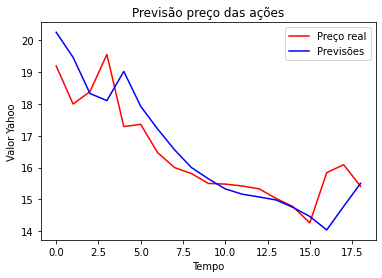

In [25]:
plt.plot(preco_real_teste,color = 'red',label = "Preço real")
plt.plot(previsoes,color ='blue',label = 'Previsões')
plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()
plt.show()